In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
from sklearn.datasets import make_circles

n_samples = 10000

x , y = make_circles(n_samples, noise=0.05, random_state=10)

In [3]:
circles = pd.DataFrame({'X0': x[:,0],
                        'X1': x[:,1],
                        'label': y})

In [4]:
circles.head()

,X0,X1,label
0,0.395886,0.956436,0
1,0.559220,-0.525473,1
2,-0.969666,0.315672,0
3,1.068930,0.130647,0
4,-0.059819,-0.828783,1


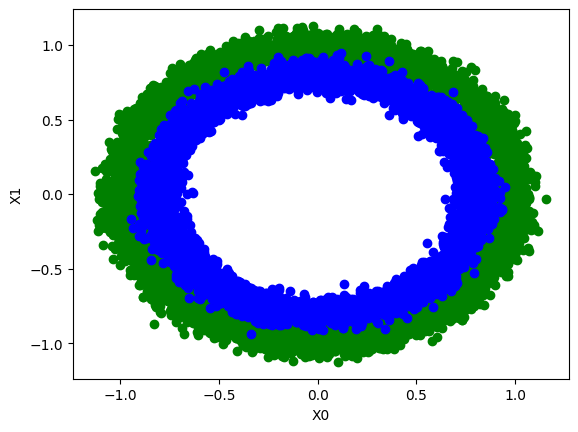

In [5]:
import matplotlib.pyplot as plt
plt.scatter(circles['X0'][circles['label'] == 0], circles['X1'][circles['label'] == 0], color='green')
plt.scatter(circles['X0'][circles['label'] == 1], circles['X1'][circles['label'] == 1], color='blue')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()


In [6]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=22)

In [7]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(99, activation = 'sigmoid'),
    tf.keras.layers.Dense(66, activation = 'sigmoid'),
    tf.keras.layers.Dense(33, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model1.compile( loss = tf.keras.losses.BinaryFocalCrossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ['accuracy'] )

model1.fit(x_train, y_train, epochs = 200, verbose=0)

model1_evaluation = model1.evaluate(x_test, y_test)
print(f"model 1 evaluation: {model1_evaluation}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9626 - loss: 0.0274
model 1 evaluation: [0.02502151019871235, 0.9676666855812073]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


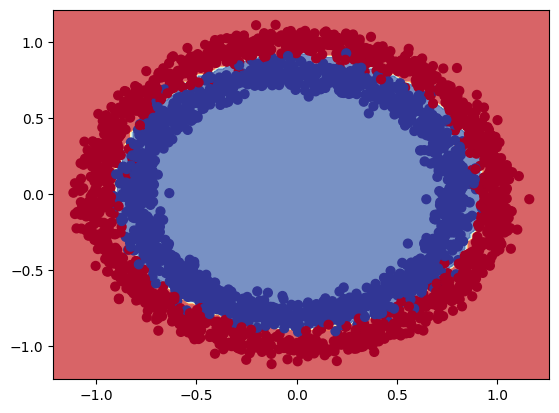

In [8]:
import numpy as np
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # number between 0-10
np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

plot_decision_boundary(model1, x_test, y_test)